In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
bikes = pd.read_csv('LR_day_data.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**Dropping Instant column as it seems like an index column which will not be required in the analysis.**

In [5]:
bikes.drop('instant',axis=1,inplace=True)

In [6]:
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
bikes.shape

(730, 15)

**Dropping date variable as this variable will not help in the model building.**

In [8]:
bikes.drop('dteday',axis=1,inplace=True)

**Dropping casual and registered columns as these are redundant variables that add up to the target variable only.**

In [9]:
bikes.drop(['casual','registered'],axis=1,inplace=True)

In [10]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
bikes.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

**As we can see there are no null values in the dataset. Hence handling null values is not required.**

In [12]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
bikes.shape

(730, 12)

### Imputing categorical variables back to their actual category labels for better understanding of the variables.

In [14]:
varlist = ['season']

bikes[varlist] = bikes[varlist].apply(lambda x:x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))

In [15]:
varlist1 = ['weathersit']

bikes[varlist1] = bikes[varlist1].apply(lambda x:x.map({1:'clear+few_clouds', 2:'mist+cloudy', 3:'lightsnow+lightrain+scatteredclouds', 4:'heavyrain+thunderstorm'}))

In [16]:
varlist2 = ['weekday']

bikes[varlist2] = bikes[varlist2].apply(lambda x:x.map({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}))

In [17]:
varlist3 =  ['mnth']

bikes[varlist3] = bikes[varlist3].apply(lambda x:x.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}))

In [18]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Tuesday,1,mist+cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Wednesday,1,mist+cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Thursday,1,clear+few_clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Friday,1,clear+few_clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Saturday,1,clear+few_clouds,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
bikes.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## Bivariate Analysis

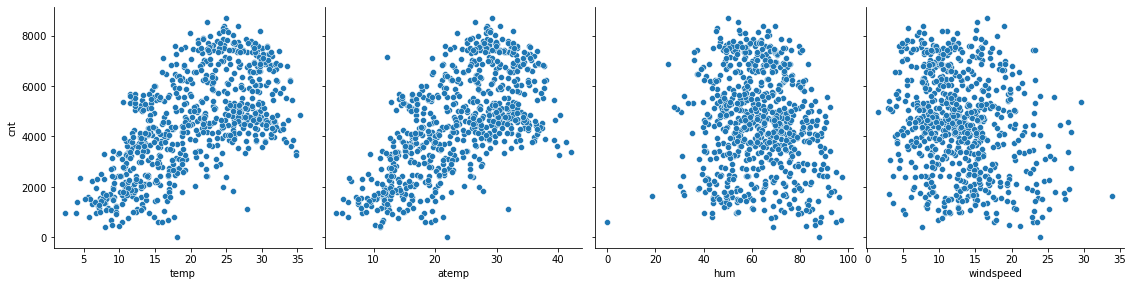

In [20]:
sns.pairplot(data=bikes, x_vars = ['temp','atemp','hum','windspeed'], y_vars = 'cnt',size=4, aspect=1, diag_kind = None)
plt.show()

### We can observe there is some kind of positive linear relationship between temp, atemp and target variable.

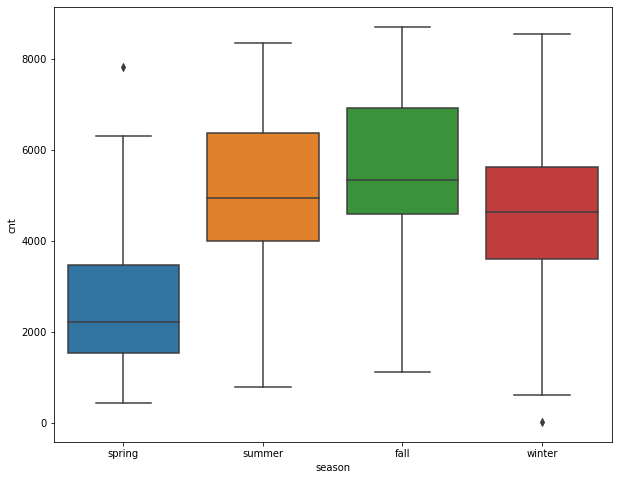

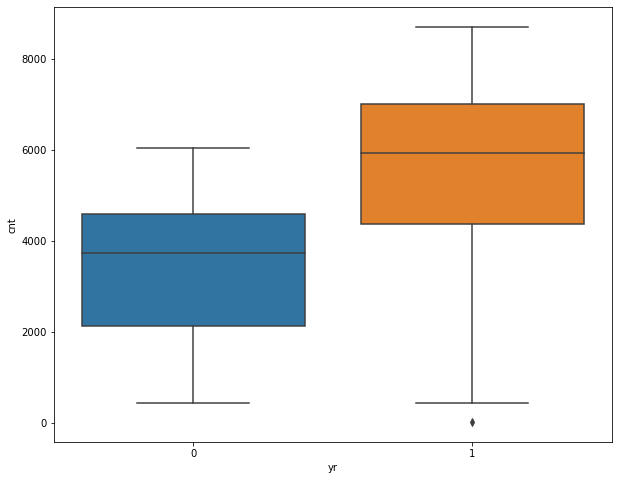

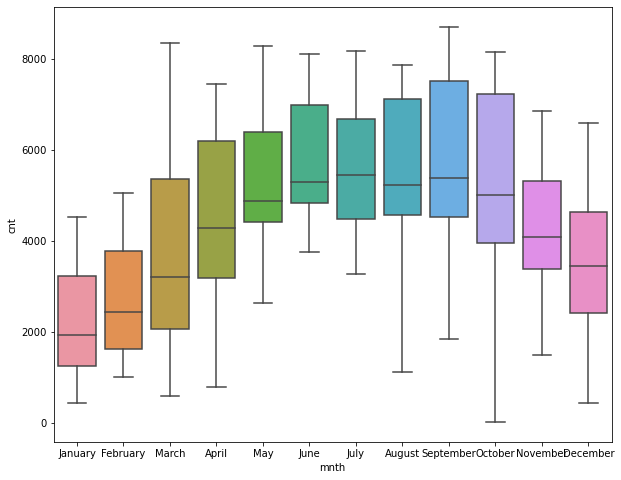

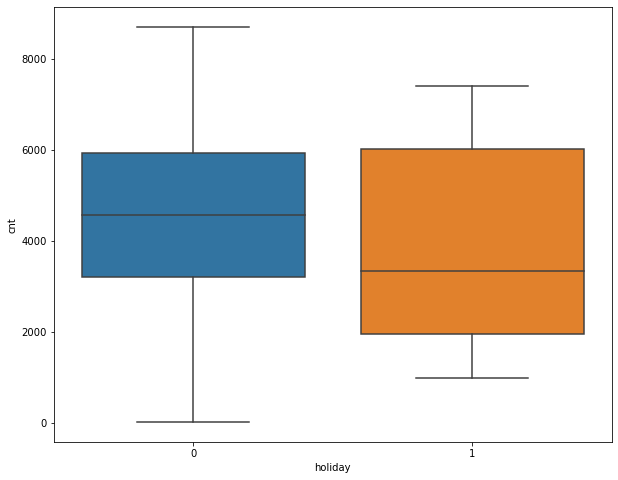

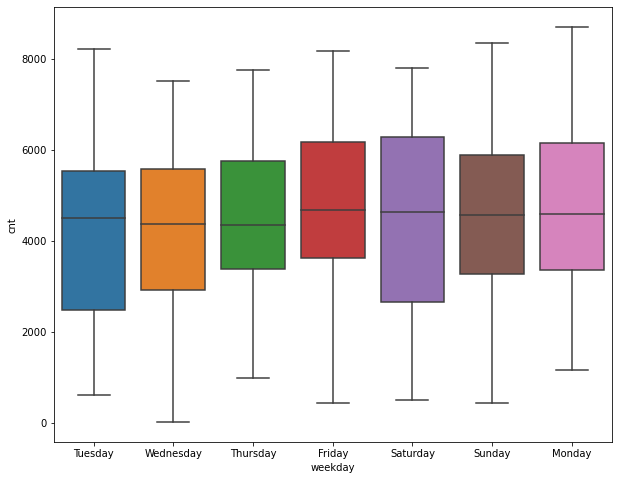

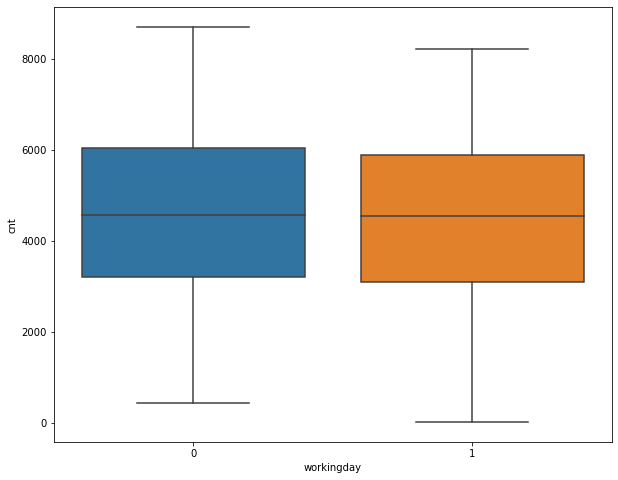

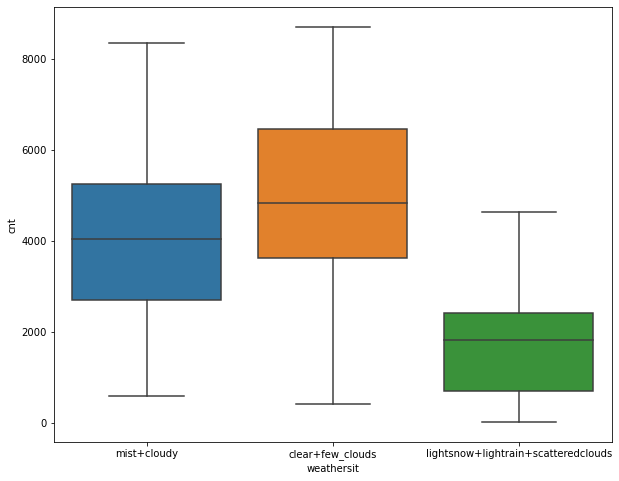

In [21]:
cat_cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

for i in cat_cols:
    plt.figure(figsize=(10,8))
    sns.boxplot(x=bikes[i], y=bikes['cnt'])
    plt.show()

**We can observe the trends of bike sales for the categorical variables above. Let's do an univariate analysis to check for outliers.**

## Univariate Analysis

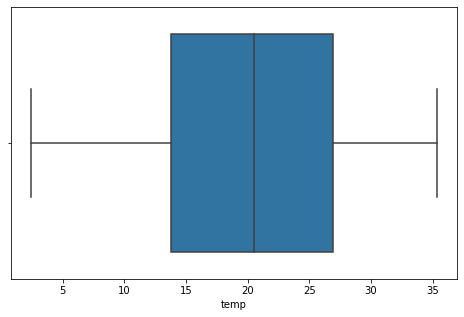

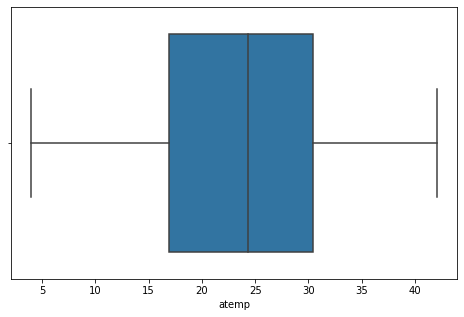

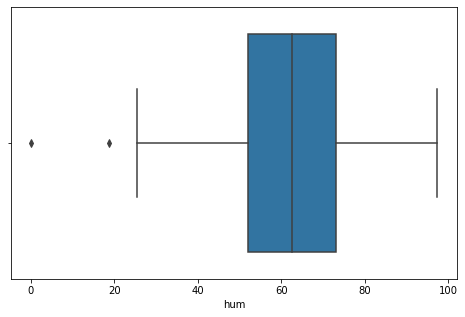

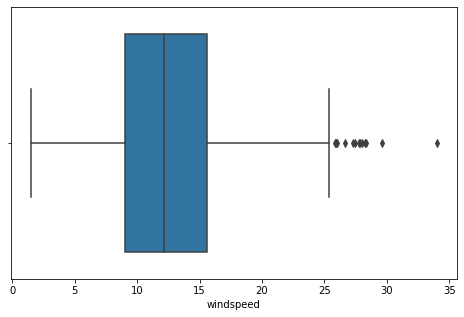

In [22]:
num_cols = ['temp','atemp','hum','windspeed']

for i in num_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=bikes[i])
    plt.show()

**There are no considerable outliers present in the data.**

**Target Variable (Cnt) Analysis**

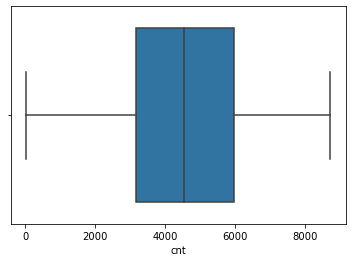

In [23]:
sns.boxplot(x=bikes['cnt'])
plt.show()

### Multivariate Analysis

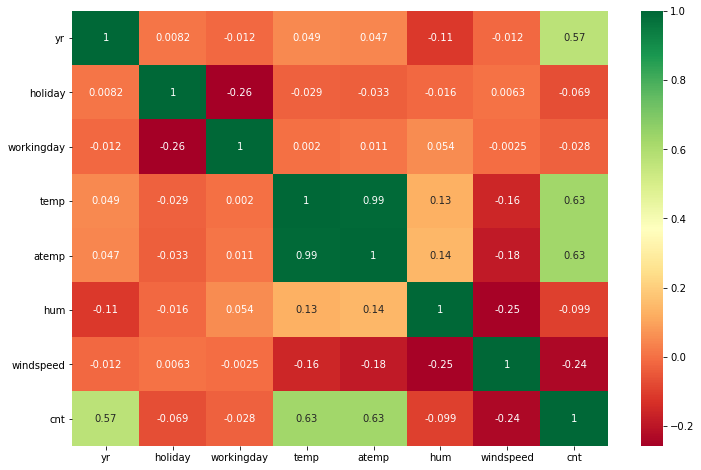

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(bikes.corr(),annot=True,cmap='RdYlGn')
plt.show()

### Observations:

- temp and atemp are highly correlated.
- temo and atemp seems to show a high positive linear relationship with the target variable count. Same had been observed in the scatter plots as well.
- We can see year also has a high positive coefficient but we have to keep in mind here correlation does not mean causation.


In [25]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Tuesday,1,mist+cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Wednesday,1,mist+cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Thursday,1,clear+few_clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Friday,1,clear+few_clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Saturday,1,clear+few_clouds,9.305237,11.46350,43.6957,12.522300,1600


### Let's create dummy variables for those categorical columns with more than 2 categories.

In [26]:
dummies = pd.get_dummies(bikes[['season','weekday','weathersit']], drop_first = True)

In [27]:
status = pd.get_dummies(bikes['mnth'], drop_first = True)

In [28]:
bikes = pd.concat([bikes,dummies,status], axis = 1)

In [29]:
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_lightsnow+lightrain+scatteredclouds,weathersit_mist+cloudy,August,December,February,January,July,June,March,May,November,October,September
0,spring,0,January,0,Tuesday,1,mist+cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,spring,0,January,0,Wednesday,1,mist+cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
2,spring,0,January,0,Thursday,1,clear+few_clouds,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,spring,0,January,0,Friday,1,clear+few_clouds,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,spring,0,January,0,Saturday,1,clear+few_clouds,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


**Let's drop the original columns for which we have created dummies**

In [30]:
bikes.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace= True)

In [31]:
bikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_lightsnow+lightrain+scatteredclouds,weathersit_mist+cloudy,August,December,February,January,July,June,March,May,November,October,September
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [32]:
bikes.shape

(730, 30)

## Splitting the data into Training and Test sets

In [33]:
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling Features

**We need to recale using MinMax Scaling**

**We will use the MinMax scaler on all variables except yes-no and dummy variables.**

In [35]:
scaler = MinMaxScaler()

In [36]:
num_vars = ['temp','atemp','hum','windspeed','cnt']

bikes_train[num_vars] = scaler.fit_transform(bikes_train[num_vars])

bikes_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_lightsnow+lightrain+scatteredclouds,weathersit_mist+cloudy,August,December,February,January,July,June,March,May,November,October,September
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [37]:
bikes_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_lightsnow+lightrain+scatteredclouds,weathersit_mist+cloudy,August,December,February,January,July,June,March,May,November,October,September
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.137255,0.147059,0.129412,0.135294,0.154902,0.152941,0.029412,0.343137,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.344454,0.354512,0.335985,0.342373,0.362166,0.360284,0.169124,0.475223,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**We can see that min and max of the numerical columns are between 0 and 1.**

## Dividing into X and Y sets for model building

In [38]:
y_train = bikes_train.pop('cnt')
X_train = bikes_train

**After we have defined the independant and dependant variables. We will have to select the best prdictor variables to predict the dependant variable. For this we will initially use an automated technique called RFE or Recursive Feature Engineering.**

We will be using the LinearRegression model from Scikit Learn due to it's compatibility with RFE.

In [39]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE (lr, 10)
rfe = rfe.fit(X_train, y_train)

In [40]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('atemp', False, 11),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 3),
 ('season_winter', True, 1),
 ('weekday_Monday', False, 10),
 ('weekday_Saturday', False, 18),
 ('weekday_Sunday', False, 9),
 ('weekday_Thursday', False, 16),
 ('weekday_Tuesday', False, 14),
 ('weekday_Wednesday', False, 13),
 ('weathersit_lightsnow+lightrain+scatteredclouds', True, 1),
 ('weathersit_mist+cloudy', False, 2),
 ('August', False, 15),
 ('December', False, 6),
 ('February', False, 7),
 ('January', False, 4),
 ('July', True, 1),
 ('June', False, 19),
 ('March', False, 20),
 ('May', False, 12),
 ('November', False, 5),
 ('October', False, 17),
 ('September', True, 1)]

**We will select the top 10 variables from this list for the model building.**

In [41]:
rfe.ranking_

array([ 1,  1,  8,  1, 11,  1,  1,  1,  3,  1, 10, 18,  9, 16, 14, 13,  1,
        2, 15,  6,  7,  4,  1, 19, 20, 12,  5, 17,  1])

In [42]:
rfe_cols = X_train.columns[rfe.support_]

rfe_cols

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'weathersit_lightsnow+lightrain+scatteredclouds',
       'July', 'September'],
      dtype='object')

In [43]:
non_rfe_cols = X_train.columns[~rfe.support_]

non_rfe_cols

Index(['workingday', 'atemp', 'season_summer', 'weekday_Monday',
       'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Tuesday', 'weekday_Wednesday', 'weathersit_mist+cloudy',
       'August', 'December', 'February', 'January', 'June', 'March', 'May',
       'November', 'October'],
      dtype='object')

## Now let's build the model using Statsmodel

**Let's create X_train dataset with RFE selected variables.**

In [44]:
X_train_rfe = X_train[rfe_cols]

**We need to add a constant variable as statsmodel by default don't consider the constant.**

In [45]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [46]:
X_train_rfe

,const,yr,holiday,temp,hum,windspeed,season_spring,season_winter,weathersit_lightsnow+lightrain+scatteredclouds,July,September
653,1.0,1,0,0.509887,0.575354,0.300794,0,1,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,1,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.605840,0.355596,0,0,0,0,0
578,1.0,1,0,0.863973,0.679690,0.187140,0,0,0,0,0
53,1.0,0,0,0.202618,0.435939,0.111379,1,0,0,0,0
350,1.0,0,0,0.248216,0.577930,0.431816,0,1,0,0,0


**Now we will fit the model by using the Ordinary Least Squares Method.**

In [47]:
lm = sm.OLS(y_train, X_train_rfe).fit()

In [48]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Sun, 09 Jun 2024   Prob (F-statistic):          1.53e-184
Time:                        15:16:09   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

### Observations:

- R2 is 83% and Adjusted R2 is 82.6%. This seems like a good model as it can explain around 82% of the variance of the dependant variable.
- F-statistic has a very low p-value which means the model fit is statistically significant.
- p-values of all the independant variables are below 0.05. Hence all the variables seems to be significant.
- Few variables(i.e. holiday,humidity,windspeed,season_spring,weathersit_lightsnow,lightrain and July) have negative coeeficients which means if these variables increase there is a decrease in the dependant variable.

**Now let's add a few more features and see if we can improve the model.**

### Let's check for VIF values to have a look at the multicollinearity of the variables

In [49]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,56.13
3,temp,2.87
6,season_spring,2.53
7,season_winter,1.75
9,July,1.29
4,hum,1.26
5,windspeed,1.15
8,weathersit_lightsnow+lightrain+scatteredclouds,1.11
10,September,1.11
1,yr,1.03


**VIF for all other variables is low except for Constant. Cut-off taken is 5.**

**We will drop the Constant variable as it has a high VIF value.**

In [50]:
X_train_rfe = X_train_rfe.drop(['const'], axis = 1)

In [51]:
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,season_spring,season_winter,weathersit_lightsnow+lightrain+scatteredclouds,July,September
653,1,0,0.509887,0.575354,0.300794,0,1,0,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,1,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,0,0,0,0


### Let's add a few more features one-by-one to the model and see if we can improve the model.

**I am adding variables based on the ranking provided by RFE.**

In [52]:
X_train_new = pd.concat([X_train_rfe,X_train['weathersit_mist+cloudy']], axis = 1)

In [53]:
X_train_new = sm.add_constant(X_train_new)

In [54]:
lm_new = sm.OLS(y_train, X_train_new).fit()

In [55]:
print(lm_new.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.0
Date:                Sun, 09 Jun 2024   Prob (F-statistic):          3.87e-189
Time:                        15:16:10   Log-Likelihood:                 503.41
No. Observations:                 510   AIC:                            -982.8
Df Residuals:                     498   BIC:                            -932.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

**We can see that Adjusted R2 has hardly increased by less than 1%. Hence we can say model has not improved by much. Let's add another variable and check.**

In [56]:
X_train_new = pd.concat([X_train_new,X_train['season_summer']], axis = 1)

In [57]:
lm_new = sm.OLS(y_train, X_train_new).fit()

In [58]:
print(lm_new.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sun, 09 Jun 2024   Prob (F-statistic):          1.69e-190
Time:                        15:16:10   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

**Again we see Adjusted R2 has hardly increased. We will take the first RFE model and remove features to optimize the model.**

**Since year is an exogenous factor, we will remove it and look at the model summary.**

In [59]:
X_train_new = X_train_new.drop('yr', axis = 1)

In [60]:
X_train_new = sm.add_constant(X_train_new)

In [61]:
lm = sm.OLS(y_train, X_train_new).fit()

In [62]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     65.03
Date:                Sun, 09 Jun 2024   Prob (F-statistic):           5.66e-89
Time:                        15:16:10   Log-Likelihood:                 265.60
No. Observations:                 510   AIC:                            -507.2
Df Residuals:                     498   BIC:                            -456.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

**Wow! We can see as we remove the year variable Adjusted R2 falls to 58.1%. Interesting.**

**I would like to metion a point here. Although Year is an exogenous factor, but if you see in the context of this problem statement demand is increasing with the popularity of bike sharing apps. Purpose for the analysis is to guage the demand and popularity of bike sharing post covid-19. Hence it is necessary to have the visibility of the increasing popularity of docking bikes. The Year variable explains exactly that, where it points to a critical piece of inference where we can see a positive coefficient of the Year variable, that shows sales is increasing with each year. The same marginal increase in sales is noticed from year 2018 to 2019 as well. Hence it is better adviced to keep the Year variable in the model.**

In [63]:
X_train_new = pd.concat([X_train_new,X_train['yr']], axis = 1)

In [64]:
lm = sm.OLS(y_train, X_train_new).fit()

In [65]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Sun, 09 Jun 2024   Prob (F-statistic):          1.69e-190
Time:                        15:16:10   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [66]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,74.38
5,season_spring,5.02
2,temp,3.61
6,season_winter,3.49
11,season_summer,2.61
3,hum,1.90
10,weathersit_mist+cloudy,1.56
8,July,1.48
9,September,1.30
7,weathersit_lightsnow+lightrain+scatteredclouds,1.24


**Let's remove season_summer, as it seems to affect the VIF value of season_spring.**

In [67]:
X_train_new.drop('season_summer', axis=1, inplace = True)

In [68]:
lm = sm.OLS(y_train, X_train_new).fit()

In [69]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.0
Date:                Sun, 09 Jun 2024   Prob (F-statistic):          3.87e-189
Time:                        15:16:10   Log-Likelihood:                 503.41
No. Observations:                 510   AIC:                            -982.8
Df Residuals:                     498   BIC:                            -932.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [70]:
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,const,59.65
2,temp,2.99
5,season_spring,2.55
3,hum,1.88
6,season_winter,1.77
10,weathersit_mist+cloudy,1.56
8,July,1.29
7,weathersit_lightsnow+lightrain+scatteredclouds,1.24
4,windspeed,1.17
9,September,1.11


**Now we seem to have an optimized model.**

### Observations:

- 83.5% of the variance in sales is explained by the model, which is a good.
- All the independant variables have a low p-value, which means the model is significant.
- F-statistic has a low-value, which also depicts the significance of this model.

Let's visualize the model.

From the parameters that we get, one of our linear regression equation for temp variable becomes.

**Sales = 2952.72 + 4186.34 x temp**

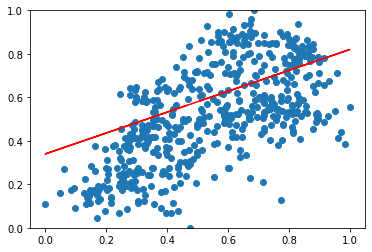

In [71]:
plt.scatter(X_train['temp'], y_train)
plt.ylim(0,1)
plt.plot(X_train['temp'],0.34 + 0.48 * X_train['temp'], 'r')
plt.show()

## Model Evaluation

**Residual Analysis**

- To validate the assumptions of the model

Firstly, we will check if the error terms are normally distributed which is one of the major assumptions of the linear regression model. To check this, we will be plotting a histogram of the error terms.

In [72]:
y_train_pred = lm.predict(X_train_new)
res = (y_train - y_train_pred)

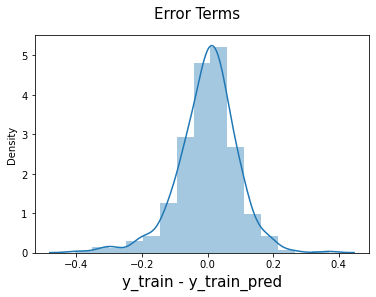

In [73]:
fig = plt.figure()
sns.distplot(res, bins=15)
fig.suptitle("Error Terms", fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

***We can see residuals are following a normally distributed pattern with a mean of 0. This is a good sign!***

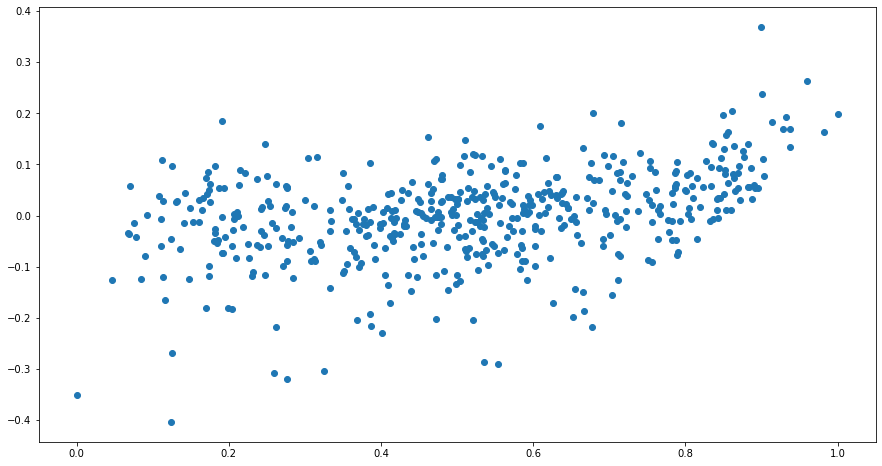

In [99]:
plt.figure(figsize=(15,8))
plt.scatter(y_train,res)
plt.show()

*****We can see here most of the error terms are scattered around 0 which is a good indication. There is no visible pattern in the error terms which is supposed to be ideal.*****

### Predictions on Test Dataset

***Scaling the test dataset***

In [74]:
num_vars = ['temp','atemp','hum','windspeed','cnt']

bikes_test[num_vars] = scaler.transform(bikes_test[num_vars])

**We will first create X and Y test sets**

In [75]:
y_test = bikes_test.pop('cnt')
X_test = bikes_test

In [76]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

***Dropping variables from X_test***

In [77]:
X_test_new = sm.add_constant(X_test)

***Adding constant***

In [78]:
X_test_new = X_test_new[X_train_new.columns]

***prediting y values corresponding to X_test_new***

In [79]:
y_pred = lm.predict(X_test_new)

In [80]:
y_pred.head()

184    0.385426
535    0.878953
299    0.395507
221    0.634868
152    0.589635
dtype: float64

In [87]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

***Checking R-squared on test set***

In [85]:
r_squared_test = r2_score(y_true=y_test, y_pred=y_pred)
r_squared_train = r2_score(y_true=y_train, y_pred=y_train_pred)

In [86]:
print(r_squared_test)
print(r_squared_train)

0.817226953642365
0.8384848445439077


***We can see there not much of a difference between the two R-squares. This shows the model is successful in predicting on the test data.***

In [88]:
# Mean_Square_Error

mean_squared_error(y_test, y_pred)

0.008680953544845082

In [90]:
#RMSE - Root Mean_Square_Error

np.sqrt(mean_squared_error(y_test, y_pred))

0.09317163487266435

In [91]:
#MAE - Mean Absolute Error

mean_absolute_error(y_test, y_pred)

0.06885875780056727

## Conclusion:

#### The variables that proved to be significant in predicting the demand for shared bikes are as follows:
-  holiday
-  temperature
-  humidity
-  windspeed
-  season_spring
-  season_winter
-  weathersit_lightsnow+lightrain+scatteredclouds
-  July
-  September
-  weathersit_mist+cloudy
-  year
       '

#### How well the above variables describe the bike demand?

- 81.7% of the variance in bike demands have been explained by the variables on the test data. 83.8% of the variance
  in bike demands have been explained by the variables on the train data.